# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as stats

In [2]:
# read in readmissions data provided
hospital_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_df

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013
5,WESTERN MISSOURI MEDICAL CENTER,260097,MO,READM-30-HIP-KNEE-HRRP,141,NaN,1.5189,8.1,5.3,19.0,07/01/2010,06/30/2013
6,SAINT AGNES HOSPITAL,210011,MD,READM-30-HIP-KNEE-HRRP,390,NaN,1.5079,7.8,5.2,38.0,07/01/2010,06/30/2013
7,MERCY HOSPITAL JEFFERSON,260023,MO,READM-30-HIP-KNEE-HRRP,178,NaN,1.5019,9.2,6.1,24.0,07/01/2010,06/30/2013
8,ONSLOW MEMORIAL HOSPITAL,340042,NC,READM-30-HIP-KNEE-HRRP,98,NaN,1.4953,7.9,5.3,15.0,07/01/2010,06/30/2013
9,FAUQUIER HOSPITAL,490023,VA,READM-30-HIP-KNEE-HRRP,256,NaN,1.4844,7.4,5.0,26.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 

#they are geting rid of observations that have have NaN in # of discharges column (still have 0s)
clean_hospital_df = hospital_df[hospital_df['Number of Discharges'] != 'Not Available']
#changing the number of discharges to an integer type
clean_hospital_df.loc[:, 'Number of Discharges'] = clean_hospital_df['Number of Discharges'].astype(int)
#sorting from small to largest
clean_hospital_df = clean_hospital_df.sort_values('Number of Discharges')

C:\Users\brian\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


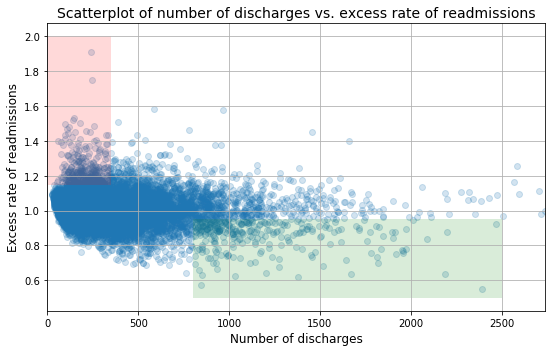

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function

#getting rid of 0s and outliers?
x = [a for a in clean_hospital_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 1000, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

##### A

I do not agree with the recommendation above as I believe the interpretations of the visualization and lack of statistics are misleading. With the initial observation, the report indicates a downward trend and the use of shaded regions attempts to reinforce this notion. We see however, that the blue cluster of points is where the majority of observations (a single observation represents a given hospital) reside, and there seems to be about an equal number of hospitals above and below the threshold of the ratio of readmissions. In addition, by singling out the shaded area, the report is cherry-picking the data that best represents their hypothesis and reporting on those observations as opposed to allowing the data to speak for itself. This is a clear sign of confirmation bias. If we were to look at the data as a whole, the majority of the hospitals hover around that threshold of 1 regardless of the number of discharges.
If we are interested in the capacity of the hospital as it relates the excess readmission rate, we may want to subdivide the above visualization into two separate visualizations based upon the capacity of the hospital. We also want to get rid of the shaded regions as it tries to highlight the authors interest in the data.

The problem with the statistics is that we are unsure as to whether or not the observed difference in excess readmission by hospital capacity was observed by chance, meaning that the true difference may be 0. There is also the ambiguity behind the rational of dividing hospital capacity using the threshold of 1000. Based on the visualization, the number of hospitals seemed disproportionally focused around a discharge of 500, and in the report, the author focused on what to do with hospitals with a size of 300. This may be important because without a substantial number of observations, any generalization about larger hospitals may not be well informed. It may be that there is an optimal size for a hospital and that tail we begin to see with larger hospitals continues increasing. Or, it could be that regardless of hospital size, hospitals have an average excess readmission ratio between 1 and 1.25. Finally, the report states that there is a negative correlation between hospital size and the excessive readmission rate without giving the correlation coefficient. The problem is that when we have a large sample size any correlation coefficient becomes significant, and we need to report that value to understand the magnitude of that relationship.


##### B
Ho: The mean excess readmission ratio of hospitals with a readmission of less than 300 is the same as hospitals that have a readmission of more than 300. 
P(mean excess readmission ratio | readmission < 300) = P(mean excess readmission ratio | readmission >= 300)

Ha: The mean excess readmission ratio of hospitals with a readmission of less than 300 is NOT the same as it is with hospitals that have a readmission of more than 300.
P(mean excess readmission ratio | readmission < 300) =/= P(mean excess readmission ratio | readmission >= 300)



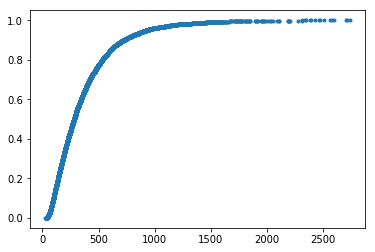

281.0
# of hospitals with readmission less than 300: 6108
# of hospitals with readmissino of 300 or greater: 5386


In [5]:
clean_hospital_df = clean_hospital_df[81:-3]
plt.plot(sorted(clean_hospital_df["Number of Discharges"]), np.arange(1, 1+len(clean_hospital_df['Number of Discharges']))/len(clean_hospital_df['Number of Discharges']), linestyle = "none", marker = '.')
plt.show()
x = np.array(sorted(clean_hospital_df["Number of Discharges"]))
print(np.median(x))
small = clean_hospital_df[clean_hospital_df['Number of Discharges'] < 300]
large = clean_hospital_df[clean_hospital_df['Number of Discharges'] >= 300]
print("# of hospitals with readmission less than 300: " +str(len(small)))
print("# of hospitals with readmissino of 300 or greater: " + str(len(large)))

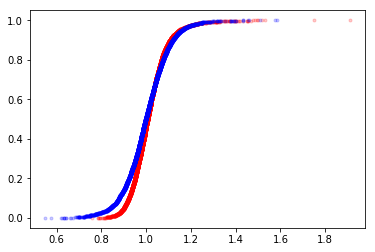

1.0142382121807445 0.9999458410694383
we have a t-value of -8.343990817665937with a p-value of 8.00179899328217e-17which means that have evidence to reject the null hypothesis
(-0.03648871325248188, 0.004343228006421686)
(-0.06691407645413673, 8.87138608488162e-07)


In [6]:
plt.plot(sorted(small["Excess Readmission Ratio"]), np.arange(1, 1+len(small["Excess Readmission Ratio"]))/len(small['Excess Readmission Ratio']), c= 'red', alpha = 0.2, linestyle = "none", marker = '.')
plt.plot(sorted(large["Excess Readmission Ratio"]), np.arange(1, 1+len(large["Excess Readmission Ratio"]))/len(large['Excess Readmission Ratio']), c= 'blue', alpha = 0.2, linestyle = "none", marker = '.')
plt.show()

print(np.mean(small['Excess Readmission Ratio']), np.mean(large['Excess Readmission Ratio']))
(t, p) = stats.ttest_ind(large['Excess Readmission Ratio'], small["Excess Readmission Ratio"])
print('we have a t-value of ' + str(t) + 'with a p-value of ' + str(p) + 'which means that have evidence to reject the null hypothesis')

print(stats.pearsonr(small['Excess Readmission Ratio'], small['Number of Discharges']))
print(stats.pearsonr(large['Excess Readmission Ratio'], large['Number of Discharges']))


Based on the distributions, we may be inclined to think that there are similar values of excess readmission rate regardless of hospital size, we need to confirm using independent samples t-test

Our t-value is statistically significant at the α = 0.01 

When we look at the correlation coefficients between the readmission ratio and number of discharges, we actually see a statistically significant negative relationship between hospital size and excessive readmission in the large group that is not shared in the smaller group

When looking at statistical significance, we see that statistical significance between the mean difference between the two groups and we see a statistical significance in the negative correlation coefficient of hospital size and excessive readmission. For the large group. However, these values do not necessarily entail practical significance. We are talking about a 0.013 difference in excessive readmissions. We don't see a drastic relationship between size and excessive readmissions for hospitals that have a relatively small size, this could mean that if we follow the recommendation of the report. We could be spending millions to consolidate hospitals and it could result in a minimum return. This boils down to how much excessive readmissions is costing. Rather, it may be more cost effective to extract the outliers from both groups and share procedures.


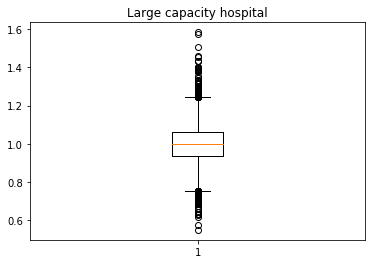

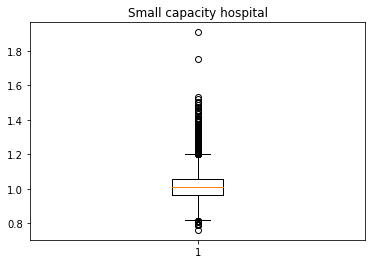

large capacity hospitals, number of outliers above, below
78 75
small capacity hospitals, number of outliers above, below
160 12


In [7]:
plt.boxplot(large['Excess Readmission Ratio'])
plt.title('Large capacity hospital')
plt.show()
plt.boxplot(small['Excess Readmission Ratio'])
plt.title('Small capacity hospital')
plt.show()
iqr_large = np.percentile(large['Excess Readmission Ratio'], 75) - np.percentile(large['Excess Readmission Ratio'], 25)
iqr_small = np.percentile(small['Excess Readmission Ratio'], 75) - np.percentile(small['Excess Readmission Ratio'], 25)
print('large capacity hospitals, number of outliers above, below')
print(np.sum(large['Excess Readmission Ratio'] >= np.percentile(large['Excess Readmission Ratio'], 75) + 1.5*iqr_large),
np.sum(large['Excess Readmission Ratio'] <= np.percentile(large['Excess Readmission Ratio'], 25) - 1.5*iqr_large))
print('small capacity hospitals, number of outliers above, below')
print(np.sum(small['Excess Readmission Ratio'] >= np.percentile(small['Excess Readmission Ratio'], 75) + 1.5*iqr_small),
np.sum(small['Excess Readmission Ratio'] <= np.percentile(small['Excess Readmission Ratio'], 25) - 1.5*iqr_small))

Based on the visualization above and the number of outliers each group contain, we can see that the smaller hospitals have a larger number of outliers and higher variance between outliers. We might think that to look at those hospitals in the large capacity group that have outliers below the median and attempt to gain further information on those. Is there something that these hospitals are doing that can be applied to all the other hospitals? The other solution might be in further examining the 165 outliers in the smaller capacity hospitals that are above the median. We might be able to figure out what is contributing to their excessive readmission and try and correct it. However, I do not think the solution should be to consolidate smaller hospitals. My guess would be that these smaller hospitals are in more rural areas and by closing down these hospitals would be to deny access to necessary medical treatment in times of emergency. I believe that if the effort is focused on the outliers, we should expect to see smaller capacity hospitals reach that average of an excess readmission ratio of 1.

In regards to the scatterplot, the advantages to having this figure, is that we can see the changes of the readmission ratio as the hospital size changes. However, besides that the graph is a bit misleading with unnecessary shading and hundreds of points overlapping. It may be better to simply separate the graph into two visuals: one for large hospital capacity and one for small hospital capacity. We could readjust the shading to indicate if a particular point is considered an outlier. This provides the information that is otherwise lacking from the previous visualization, e.g. an incorporation of the statistics and correct using of shading

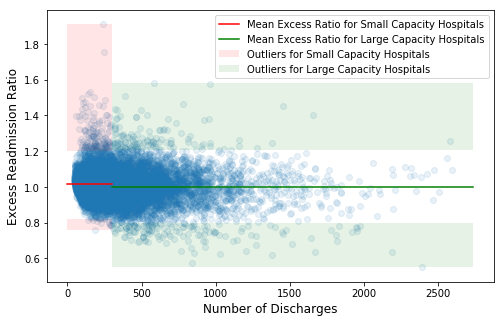

In [8]:

x = [a for a in clean_hospital_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.1)
ax.plot((0, 299), (np.mean(small['Excess Readmission Ratio']),np.mean(small['Excess Readmission Ratio'])), c='red', label = 'Mean Excess Ratio for Small Capacity Hospitals')
ax.plot((300, np.max(large['Number of Discharges'])), (np.mean(large['Excess Readmission Ratio']),np.mean(large['Excess Readmission Ratio'])), c='green', label = 'Mean Excess Ratio for Large Capacity Hospitals')
ax.fill_between([0,300],np.percentile(small['Excess Readmission Ratio'], 75) + 1.5*iqr_small, np.max(small['Excess Readmission Ratio']), interpolate=True, facecolor='red', alpha= 0.1,  label = 'Outliers for Small Capacity Hospitals')
ax.fill_between([0,300],np.percentile(small['Excess Readmission Ratio'], 25) - 1.5*iqr_small, np.min(small['Excess Readmission Ratio']), interpolate=True, facecolor='red', alpha= 0.1)
ax.fill_between([300,np.max(large['Number of Discharges'])],np.percentile(large['Excess Readmission Ratio'], 75) + 1.5*iqr_small, np.max(large['Excess Readmission Ratio']), interpolate=True, facecolor='green', alpha= 0.1,  label = 'Outliers for Large Capacity Hospitals')
ax.fill_between([300,np.max(large['Number of Discharges'])],np.percentile(large['Excess Readmission Ratio'], 25) - 1.5*iqr_small, np.min(large['Excess Readmission Ratio']), interpolate=True, facecolor='green', alpha= 0.1)

ax.set_xlabel('Number of Discharges', fontsize= 12)
ax.set_ylabel('Excess Readmission Ratio', fontsize=12)
ax.legend()


In [9]:
#grand = np.mean(clean_hospital_df['Excess Readmission Ratio'])
#large_mean = np.mean(large['Excess Readmission Ratio'])
#small_mean = np.mean(small['Excess Readmission Ratio'])
#mean_dif = large_mean - small_mean
#large_shift = large['Excess Readmission Ratio'] - large_mean + grand
#small_shift = small['Excess Readmission Ratio'] - small_mean + grand
#large_replicates = np.empty(1000000)
#small_replicates = np.empty(1000000)
#for i in range(1000000):
#    large_bs = np.random.choice(large_shift, size=len(large_shift))
#    small_bs = np.random.choice(small_shift, size = len(small_shift))
#    large_replicates[i] = np.mean(large_bs)
#    small_replicates[i] = np.mean(small_bs)
#bs_replicates = large_replicates - small_replicates
#pvalue = np.sum(bs_replicates <= mean_dif)/len(bs_replicates)
#print(pvalue)